In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기 및 전처리
q_LIWC = pd.read_csv("../../R/data/LIWC_questions.csv")
df_q = pd.read_csv("../../R/data/questions.csv")
df_q = df_q.merge(q_LIWC[['q_Id', 'BigWords']], on='q_Id', how='left')


# 필터링
df_filtered = df_q[(df_q['q_rel_week'] >= -8) & (df_q['q_rel_week'] <= 20)]

In [2]:
model = smf.ols('BigWords ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_filtered).fit(cov_type='HC1')

In [3]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [4]:
coefs

,term,Estimate,Std. Error
0,"C(q_rel_week, Treatment(reference=-8))[T.-7]",0.034362,0.075676
1,"C(q_rel_week, Treatment(reference=-8))[T.-6]",0.007989,0.075328
2,"C(q_rel_week, Treatment(reference=-8))[T.-5]",-0.142499,0.076199
3,"C(q_rel_week, Treatment(reference=-8))[T.-4]",-0.082699,0.076250
4,"C(q_rel_week, Treatment(reference=-8))[T.-3]",-0.195548,0.075334
5,"C(q_rel_week, Treatment(reference=-8))[T.-2]",-0.038952,0.075262
6,"C(q_rel_week, Treatment(reference=-8))[T.-1]",0.009776,0.076470
7,"C(q_rel_week, Treatment(reference=-8))[T.0]",-0.119697,0.075729
8,"C(q_rel_week, Treatment(reference=-8))[T.1]",-0.162229,0.075535
9,"C(q_rel_week, Treatment(reference=-8))[T.2]",0.139090,0.076359


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime
from wordcloud import WordCloud
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. 파일호출

In [6]:
# 파일 불러오기
with open('../../data/df_wl.pkl', 'rb') as f:
    df_wl = pickle.load(f)


In [7]:
df_wl['creationdate'].min()

Timestamp('2021-10-01 00:00:26.287000')

In [8]:
# df_wl['wl_list'] = df_wl['over4'].apply(lambda x : [len(w) for w in x])

In [9]:
df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
df_wl['over7'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_wl['over8'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])


In [10]:
df_wl['wl_6_len'] = df_wl['wl_6'].apply(lambda x : len(x) )
df_wl['wl_over6_len'] = df_wl['over6'].apply(lambda x : len(x) )
df_wl['wl_over7_len'] = df_wl['over7'].apply(lambda x : len(x) )
df_wl['wl_over8_len'] = df_wl['over8'].apply(lambda x : len(x) )

In [ ]:
df_wl_bf = df_wl[(df_wl['creationdate']>= '2021-10-01') & (df_wl['creationdate']<= '2022-03-19') ]
df_wl_af = df_wl[(df_wl['creationdate']>= '2022-10-01') & (df_wl['creationdate']<= '2023-03-19') ]

In [ ]:
df_wl_bf['q_treat'] =0
df_wl_af['q_treat'] =1

In [ ]:
bf_std_date = datetime.date(2021,11,30)
af_std_date = datetime.date(2022,11,30)

In [ ]:
df_wl_bf['c_date'] = pd.to_datetime(df_wl_bf['creationdate']).dt.date
df_wl_af['c_date'] = pd.to_datetime(df_wl_af['creationdate']).dt.date

In [ ]:
df_wl_bf['diff_day'] = df_wl_bf['c_date'].values - bf_std_date
df_wl_bf['diff_day'] = df_wl_bf['diff_day'].dt.days

df_wl_af['diff_day'] = df_wl_af['c_date'].values - af_std_date
df_wl_af['diff_day'] = df_wl_af['diff_day'].dt.days


In [ ]:
df_wl_bf['diff_week'] = df_wl_bf['diff_day'].apply(lambda x  : math.ceil(x/7))
df_wl_af['diff_week'] = df_wl_af['diff_day'].apply(lambda x  : math.ceil(x/7))

In [ ]:
print(df_wl_bf['diff_week'].min())
print(df_wl_bf['diff_week'].max())
print(df_wl_af['diff_week'].min())
print(df_wl_af['diff_week'].max())

In [ ]:
df_wl_bf

In [ ]:
df_wl_cc = pd.concat([df_wl_bf, df_wl_af], axis =0)

In [ ]:
df_wl_cc.head()

In [ ]:
df_wl_cc['diff_week'].max()

In [ ]:
df_filtered_chk = df_filtered[['q_Id','BigWords', 'q_treat']]
df_filtered_chk.shape

In [ ]:
df_len_chk = pd.merge(df_filtered, df_wl_cc[['id', 'body_prep', 'wl_over6_len', 'wl_over7_len', 'wl_over8_len', 'diff_week']], left_on='q_Id', right_on = 'id')

In [ ]:
print(df_len_chk.loc[df_len_chk['id'].isna(), 'q_CreationDate'].min())
print(df_len_chk.loc[df_len_chk['id'].isna(), 'q_CreationDate'].max())

In [ ]:
df_len_chk.loc[df_len_chk['id'].isna(), :]

In [ ]:
# 여기가 문제임!!
df_len_chk.loc[df_len_chk['q_rel_week']!=df_len_chk['diff_week'], ['q_rel_week', 'diff_week']]

In [ ]:
df_len_chk.loc[df_len_chk['id'] == 73954723, 'body_prep'].values

In [ ]:
df_wl_cc.loc[df_wl_cc['id'] == 73954723, 'over6'].values[0]

In [ ]:
len(df_wl_cc.loc[df_wl_cc['id'] == 73954723, 'over6'].values[0])

In [ ]:
df_wl_cc

In [ ]:
df_len_chk[['wl_over7_len', 'wl_over8_len']]

In [ ]:
model = smf.ols('wl_over8_len ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_len_chk).fit(cov_type='HC1')

In [ ]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [ ]:
coefs

In [ ]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [ ]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[24:, :]

In [ ]:
coefs_

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()


In [ ]:
df_wl[df_wl['id'] ==75056565]

In [ ]:
df_wl.loc[df_wl['id'] ==75056565, 'body_prep'].values

In [ ]:
df_wl.loc[df_wl['id'] ==75056565, 'over6'].values

In [ ]:
df_wl.tail(20)

In [ ]:
model = smf.ols('wl_over7_len ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_len_chk).fit(cov_type='HC1')

In [ ]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [ ]:
coefs

In [ ]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [ ]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[24:, :]

In [ ]:
coefs_

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()


In [13]:
df_wl['date'] = pd.to_datetime(df_wl['creationdate']).dt.date

In [23]:
df_wl = df_wl[df_wl['posttypeid'].isin(['1', '2'])]

In [24]:
df_wl_pt = df_wl.groupby(['date', 'posttypeid']).sum([['wl_over6_len', 'wl_over7_len', 'wl_over8_len']]).reset_index()

In [26]:
df_wl_pt = df_wl_pt.pivot_table(index = 'date', columns = 'posttypeid', values = ['wl_over6_len', 'wl_over7_len', 'wl_over8_len']).reset_index()

In [39]:
df_wl_pt['wl_over6_rate'] = df_wl_pt[('wl_over6_len', '2')]/df_wl_pt[('wl_over6_len', '1')]
df_wl_pt['wl_over7_rate'] = df_wl_pt[('wl_over7_len', '2')]/df_wl_pt[('wl_over7_len', '1')]
df_wl_pt['wl_over8_rate'] = df_wl_pt[('wl_over8_len', '2')]/df_wl_pt[('wl_over8_len', '1')]

In [40]:
df_wl_pt

date wl_over6_len          wl_over7_len           \
posttypeid                        1        2            1        2   
0           2021-10-01      98193.0  88772.0      71641.0  64817.0   
1           2021-10-02      58970.0  55916.0      42831.0  40804.0   
2           2021-10-03      62422.0  60323.0      45307.0  44010.0   
3           2021-10-04     103943.0  91025.0      75623.0  66513.0   
4           2021-10-05     114249.0  97722.0      83167.0  71081.0   
..                 ...          ...      ...          ...      ...   
786         2023-11-26      53174.0  34097.0      39521.0  25069.0   
787         2023-11-27      94981.0  54454.0      70482.0  40276.0   
788         2023-11-28     105000.0  54141.0      78157.0  40275.0   
789         2023-11-29     107619.0  58050.0      80425.0  42892.0   
790         2023-11-30     106219.0  58633.0      79011.0  43443.0   

           wl_over8_len          wl_over6_rate wl_over7_rate wl_over8_rate  
posttypeid            1        2             2             2             2  
0               47294.0  43674.0      0.904056      0.904747      0.923458  
1               28621.0  27582.0      0.948211      0.952674      0.963698  
2               30049.0  29642.0      0.966374      0.971373      0.986455  
3               49768.0  45253.0      0.875720      0.879534      0.909279  
4               55451.0  48237.0      0.855342      0.854678      0.869903  
..                  ...      ...           ...           ...           ...  
786             26375.0  17189.0      0.641234      0.634321      0.651716  
787             47064.0  27691.0      0.573315      0.571437      0.588369  
788             52784.0  27768.0      0.515629      0.515309      0.526069  
789             54278.0  29104.0      0.539403      0.533317      0.536203  
790             53542.0  29648.0      0.552001      0.549835      0.553734  

[791 rows x 10 columns]

In [42]:
df_wl_pt.columns

MultiIndex([(         'date',  ''),
            ( 'wl_over6_len', '1'),
            ( 'wl_over6_len', '2'),
            ( 'wl_over7_len', '1'),
            ( 'wl_over7_len', '2'),
            ( 'wl_over8_len', '1'),
            ( 'wl_over8_len', '2'),
            ('wl_over6_rate', '2'),
            ('wl_over7_rate', '2'),
            ('wl_over8_rate', '2')],
           names=[None, 'posttypeid'])

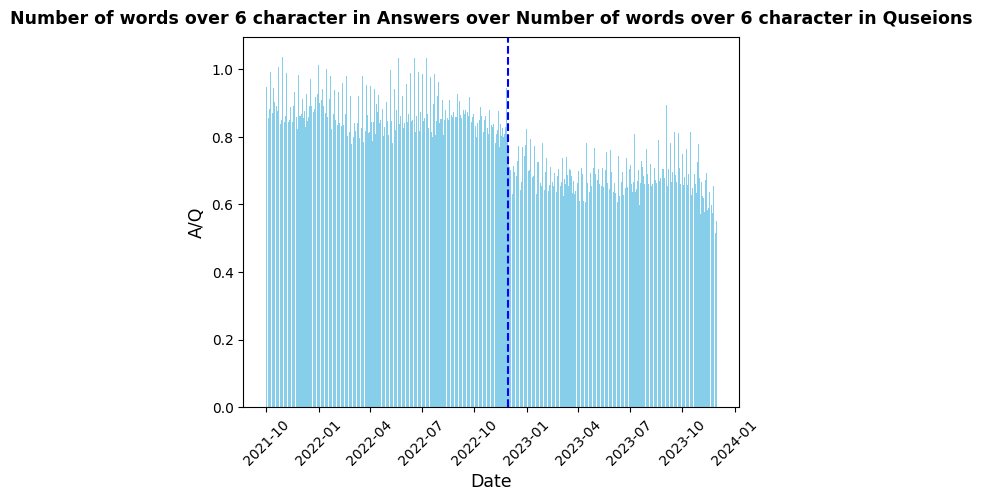

In [46]:
fig, ax = plt.subplots()


ax.bar(df_wl_pt.date
    ,  height = df_wl_pt[('wl_over6_rate', '2')]
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Number of words over 6 character in Answers over Number of words over 6 character in Quseions", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



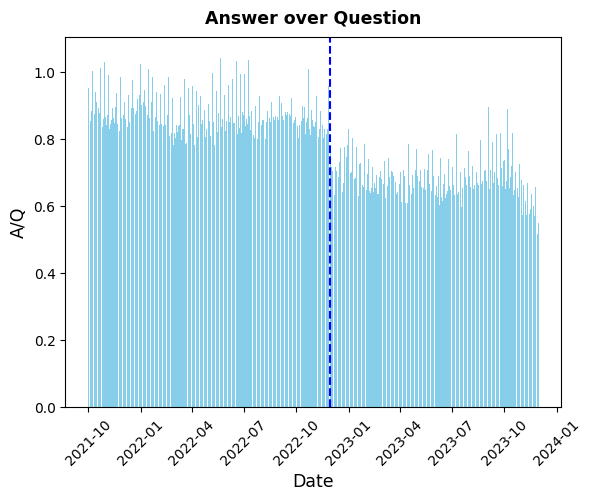

In [44]:
fig, ax = plt.subplots()


ax.bar(df_wl_pt.date
    ,  height = df_wl_pt[('wl_over7_rate', '2')]
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer over Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



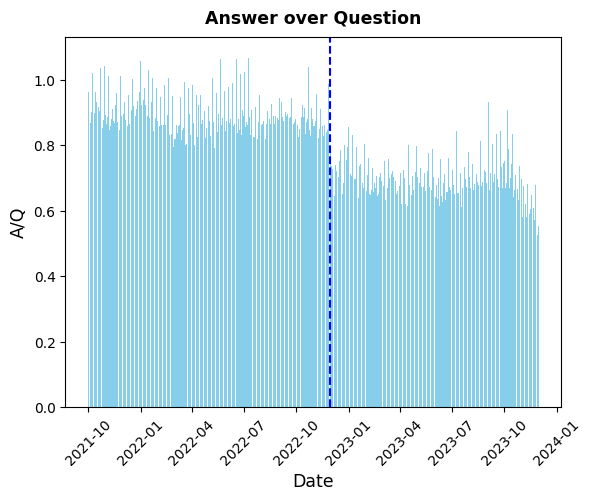

In [45]:
fig, ax = plt.subplots()


ax.bar(df_wl_pt.date
    ,  height = df_wl_pt[('wl_over8_rate', '2')]
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer over Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 생성
# data = pd.DataFrame({
#     'date': ...,  # 날짜 데이터 (예: '2024-01-01' 등)
#     'A': ...,     # 답변 수
#     'Q': ...,     # 질문 수
#     'difficulty': ...  # 난이도 (예: 'easy', 'medium', 'hard')
# })

# A/Q 계산
data['A/Q'] = data['A'] / data['Q']

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='A/Q', hue='difficulty', data=data, palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('A/Q over Time by Difficulty')
plt.xlabel('Date')
plt.ylabel('A/Q (Answers per Question)')
plt.xticks(rotation=45)

# 그래프 표시
plt.show()